In [34]:
from PIL import Image
import os

input_folder =  r"C:\Projects\Image_classification\cnn_cat_dog\test_images"  # or 'dogs'
output_format = 'jpeg'  # or 'png'

for filename in os.listdir(input_folder):
    if filename.endswith('.webp'):
        path = os.path.join(input_folder, filename)
        img = Image.open(path).convert('RGB')
        new_filename = filename.replace('.webp', '.jpg')
        img.save(os.path.join(input_folder, new_filename), output_format.upper())
        os.remove(path)  # remove original .webp file if needed


In [35]:
from PIL import Image
import os

input_folder =  r"C:\Projects\Image_classification\cnn_cat_dog\cats"  # or 'dogs'
output_format = 'jpeg'  # or 'png'

for filename in os.listdir(input_folder):
    if filename.endswith('.webp'):
        path = os.path.join(input_folder, filename)
        img = Image.open(path).convert('RGB')
        new_filename = filename.replace('.webp', '.jpg')
        img.save(os.path.join(input_folder, new_filename), output_format.upper())
        os.remove(path)  # remove original .webp file if needed

In [36]:
from PIL import Image
import os

input_folder =  r"C:\Projects\Image_classification\cnn_cat_dog\dogs"  # or 'dogs'
output_format = 'jpeg'  # or 'png'

for filename in os.listdir(input_folder):
    if filename.endswith('.webp'):
        path = os.path.join(input_folder, filename)
        img = Image.open(path).convert('RGB')
        new_filename = filename.replace('.webp', '.jpg')
        img.save(os.path.join(input_folder, new_filename), output_format.upper())
        os.remove(path)  # remove original .webp file if needed

In [ ]:
import os

# Set your folder path
folder_path = r"C:\Projects\Image_classification\cnn_cat_dog\cats"

# List all files in the folder
files = os.listdir(folder_path)

# Sort files to ensure consistent order
files.sort()

# Rename each file
for idx, filename in enumerate(files, start=1):
    # Get the file extension
    ext = os.path.splitext(filename)[1]

    # New filename
    new_name = f"cat{idx}{ext}"

    # Full path for old and new names
    old_file = os.path.join(folder_path, filename)
    new_file = os.path.join(folder_path, new_name)

    # Rename the file
    os.rename(old_file, new_file)

print("Renaming complete!")


In [ ]:
# Set your folder path
folder_path = r"C:\Projects\Image_classification\cnn_cat_dog\dogs"

# List all files in the folder
files = os.listdir(folder_path)

# Sort files to ensure consistent order
files.sort()

# Rename each file
for idx, filename in enumerate(files, start=1):
    # Get the file extension
    ext = os.path.splitext(filename)[1]

    # New filename
    new_name = f"dog{idx}{ext}"

    # Full path for old and new names
    old_file = os.path.join(folder_path, filename)
    new_file = os.path.join(folder_path, new_name)

    # Rename the file
    os.rename(old_file, new_file)

print("Renaming complete!")

In [ ]:
pip install tensorflow matplotlib numpy scikit-learn

In [12]:
import tensorflow as tf
print(tf.__version__)


2.20.0-rc0


In [37]:
import os                                                  # For file and directory operations
import numpy as np                                         # For array manipulation
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # For loading and processing images
from sklearn.model_selection import train_test_split       # For splitting data into train/validation sets

image_size = (128, 128)                                    # Define standard image dimensions for processing

def load_images(folder, label):                            # Helper function to load and process images
    images, labels = [], []                                # Initialize empty lists for images and labels
    for filename in os.listdir(folder):                    # Loop through all files in the folder
        path = os.path.join(folder, filename)              # Create full path to the image
        img = load_img(path, target_size=image_size)       # Load and resize image to standard size
        img = img_to_array(img) / 255.0                    # Convert to array and normalize pixel values to [0,1]
        images.append(img)                                 # Add processed image to list
        labels.append(label)                               # Add corresponding label to list
    return images, labels                                  # Return processed images and labels

# Load images
cat_images, cat_labels = load_images(r'C:\Projects\Image_classification\cnn_cat_dog\cats', 0)  # Load cat images with label 0
dog_images, dog_labels = load_images(r'C:\Projects\Image_classification\cnn_cat_dog\dogs', 1)  # Load dog images with label 1

# Combine
X = np.array(cat_images + dog_images)                      # Combine all images into a single numpy array
y = np.array(cat_labels + dog_labels)                      # Combine all labels into a single numpy array

# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data: 80% training, 20% validation

In [38]:
from tensorflow.keras.models import Sequential  # Import Sequential model for building layer-by-layer networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # Import layer types needed for CNN

model = Sequential([  # Create a sequential model (layers processed in order)
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),  # First conv layer: 32 filters of size 3x3, ReLU activation, input is 128x128 RGB images
    MaxPooling2D(2,2),  # Reduce spatial dimensions by half (2x2 pooling)
    
    Conv2D(64, (3,3), activation='relu'),  # Second conv layer: 64 filters of size 3x3, ReLU activation
    MaxPooling2D(2,2),  # Another 2x2 pooling to further reduce dimensions
    
    Flatten(),  # Convert 2D feature maps to 1D vector for dense layers
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer: 1 neuron with sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Configure model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.summary()  # Print a summary of the model architecture

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)             │ (None, 126, 126, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 63, 63, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 61, 61, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_3 (Flatten)           │ (None, 57600)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 64)            │    3,686,464 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_7 (Dense)               │ (None, 1)             │           65 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 1.8047
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5000 - loss: 1.3011 - val_accuracy: 0.5000 - val_loss: 2.0561
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5000 - loss: 2.2639 - val_accuracy: 0.5000 - val_loss: 0.8657
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5000 - loss: 0.8106 - val_accuracy: 0.5000 - val_loss: 0.6642
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7500 - loss: 0.4309 - val_accuracy: 0.5000 - val_loss: 0.9001
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5625 - loss: 0.5700 - val_accuracy: 0.5000 - val_loss: 0.7527
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7500 - loss: 0.4254 - val_accuracy: 0.7500 - val_loss: 0.5405
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.2928 - val_accuracy: 0.5000 - val_loss: 0.

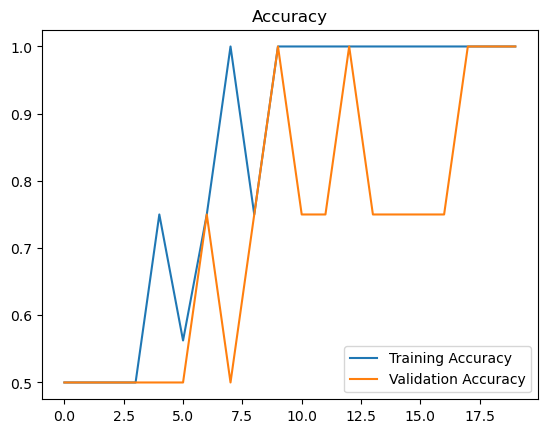

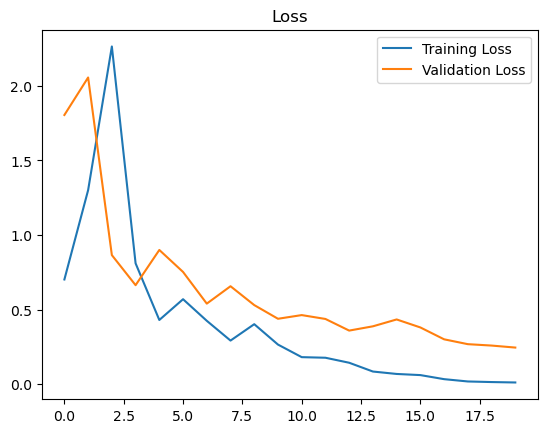

In [40]:
import matplotlib.pyplot as plt  # Import the plotting library

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy line
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy line
plt.legend()  # Add a legend to identify each line
plt.title('Accuracy')  # Set the title of the plot
plt.show()  # Display the plot

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss line
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss line
plt.legend()  # Add a legend to identify each line
plt.title('Loss')  # Set the title of the plot
plt.show()  # Display the plot

In [50]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = load_img(img_path, target_size=(128,128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    
    if prediction > 0.5:
        print("Prediction: Dog 🐶", f" (Confidence: {prediction:.2f})")
    else:
        print("Prediction: Cat 🐱", f" (Confidence: {1-prediction:.2f})")

# Test your model
predict_image(r"C:\Projects\Image_classification\cnn_cat_dog\test_images\unknown5.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Cat 🐱  (Confidence: 0.94)
